In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='pastel')

In [2]:
# ==========================================================
# 1. Load Dataset
# ==========================================================
data_path = "D:/4Week-4Project_Challenge/smart-placement-insights/data/CollegePlacement.csv"
df = pd.read_csv(data_path)

print("Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()

Dataset loaded successfully!
Shape: (10000, 10)


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [3]:
# ==========================================================
# 2. Basic Info and Summary
# ==========================================================

# Dataset info
df.info()

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Summary statistics for numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB

Missing values per column:
College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience   

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


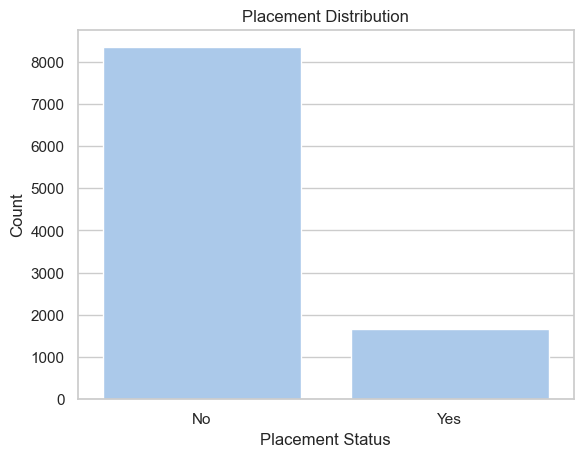

In [4]:
#This will show how many students got placed vs not placed
sns.countplot(x='Placement', data=df)
plt.title("Placement Distribution")
plt.xlabel("Placement Status")
plt.ylabel("Count")
plt.show()

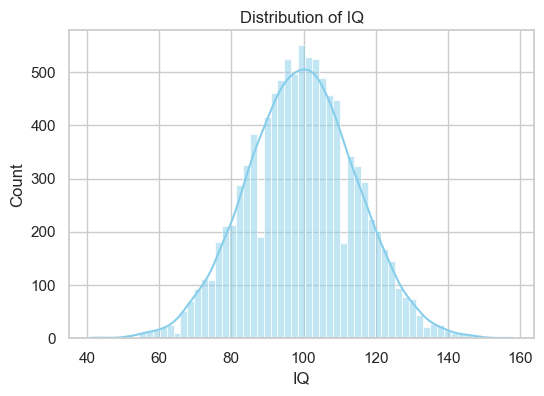

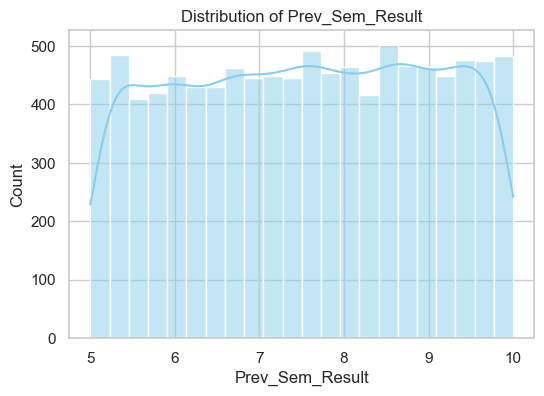

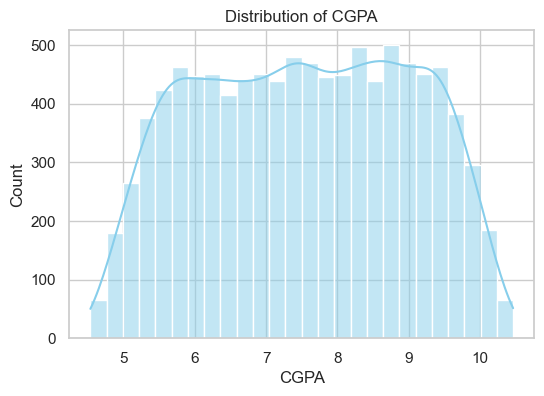

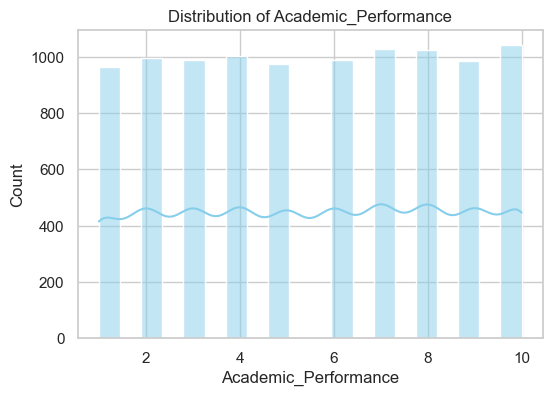

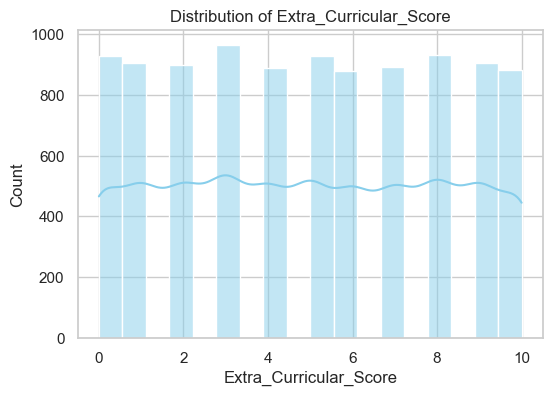

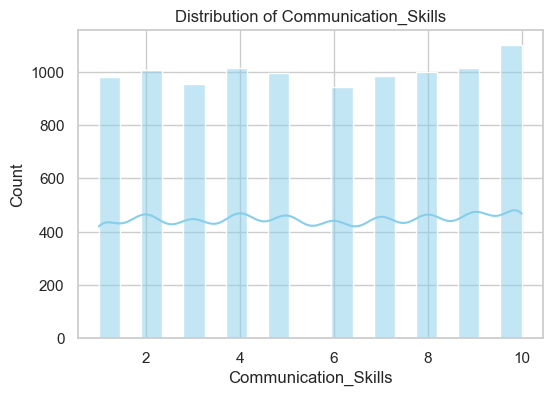

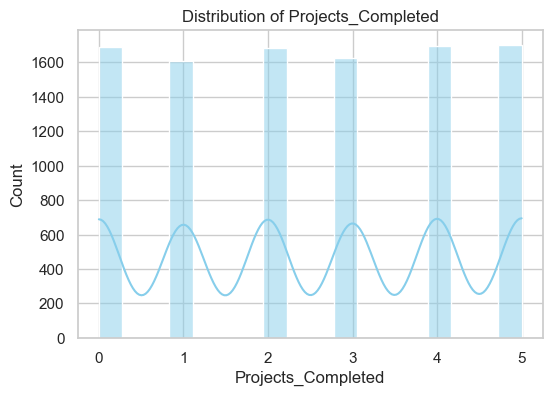

In [5]:
#This helps visualize the spread and detect any skewness or outliers.
num_cols = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
            'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()


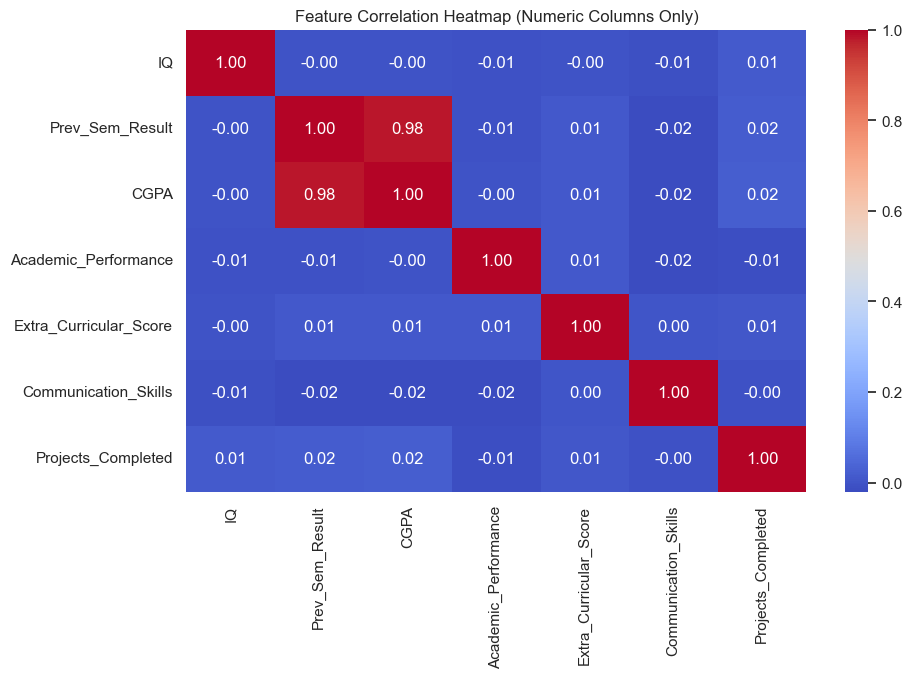

In [6]:
#This will help identify relationships between numeric features (for example, CGPA vs Prev_Sem_Result).
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap (Numeric Columns Only)")
plt.show()

In [7]:
# ==========================================================
# 3. Data Preprocessing
# ==========================================================

# Drop columns not useful for prediction (College_ID)
df = df.drop(columns=['College_ID'])

# Encode categorical columns (Internship_Experience, Placement)
df['Internship_Experience'] = df['Internship_Experience'].map({'Yes': 1, 'No': 0})
df['Placement'] = df['Placement'].map({'Yes': 1, 'No': 0})

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check data types
print("\nData Types:\n", df.dtypes)

# Features and target
X = df.drop(columns=['Placement'])
y = df['Placement']

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nData Preprocessing Completed!")
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Missing Values:
 IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

Data Types:
 IQ                          int64
Prev_Sem_Result           float64
CGPA                      float64
Academic_Performance        int64
Internship_Experience       int64
Extra_Curricular_Score      int64
Communication_Skills        int64
Projects_Completed          int64
Placement                   int64
dtype: object

Data Preprocessing Completed!
Training Data Shape: (8000, 8)
Testing Data Shape: (2000, 8)


In [8]:
# ==========================================================
# 4. Feature Scaling
# ==========================================================
from sklearn.preprocessing import StandardScaler

# Create scaler instance
scaler = StandardScaler()

# Fit on training data and transform both train & test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature Scaling Completed!")
print("Mean of scaled training data (approx):", np.round(X_train_scaled.mean(), 2))
print("Std of scaled training data (approx):", np.round(X_train_scaled.std(), 2))


Feature Scaling Completed!
Mean of scaled training data (approx): 0.0
Std of scaled training data (approx): 1.0


In [9]:
# ==========================================================
# 5. Model Building and Evaluation
# ==========================================================
#5.1. Split the Dataset
from sklearn.model_selection import train_test_split

X = df.drop('Placement', axis=1)  # replace with your actual target column name
y = df['Placement']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# ==========================================================
# 5.2 Train and Evaluate Multiple Models (Fixed)
# ==========================================================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1 Score": round(f1, 4)
    })

# Convert results to DataFrame for display
results_df = pd.DataFrame(results)
print("Model Evaluation Results:")
print(results_df)

Model Evaluation Results:
                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.9035     0.7769  0.5873     0.669
1        Random Forest    0.9990     1.0000  0.9940     0.997
2    Gradient Boosting    1.0000     1.0000  1.0000     1.000



=== Logistic Regression ===
                  Feature  Importance
2                    CGPA    1.029549
7      Projects_Completed    0.690684
6    Communication_Skills    0.649050
1         Prev_Sem_Result    0.214290
0                      IQ    0.108020
4   Internship_Experience    0.028854
3    Academic_Performance   -0.003782
5  Extra_Curricular_Score   -0.014018


C:\Users\AKSHAT KULKARNI\AppData\Local\Temp\ipykernel_12772\2135960446.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


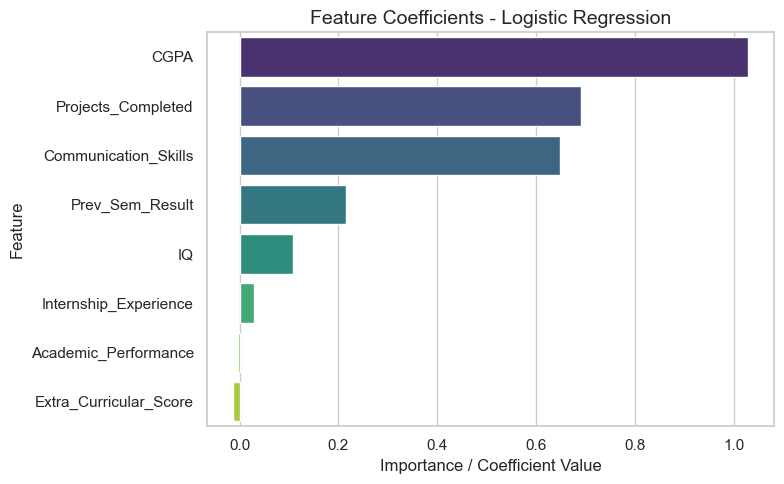


=== Random Forest ===
                  Feature  Importance
6    Communication_Skills    0.293139
0                      IQ    0.255608
7      Projects_Completed    0.173589
2                    CGPA    0.147822
1         Prev_Sem_Result    0.102406
5  Extra_Curricular_Score    0.013120
3    Academic_Performance    0.010927
4   Internship_Experience    0.003390


C:\Users\AKSHAT KULKARNI\AppData\Local\Temp\ipykernel_12772\2135960446.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


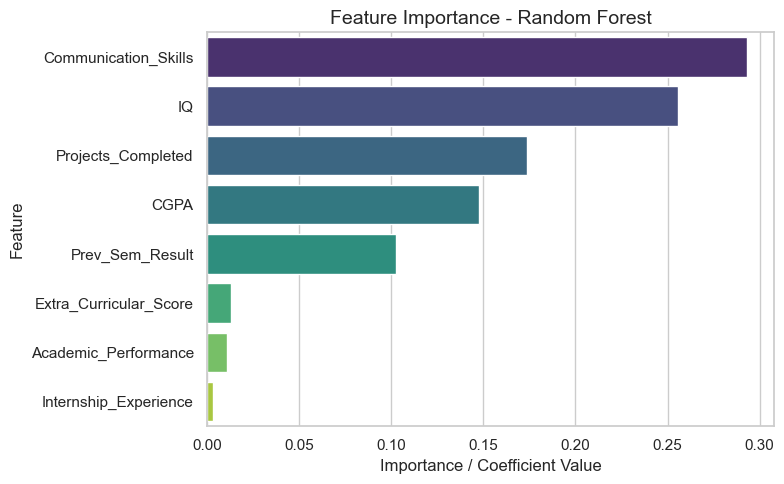


=== Gradient Boosting ===
                  Feature  Importance
2                    CGPA    0.364596
0                      IQ    0.234714
6    Communication_Skills    0.216646
7      Projects_Completed    0.182621
1         Prev_Sem_Result    0.001131
3    Academic_Performance    0.000294
4   Internship_Experience    0.000000
5  Extra_Curricular_Score    0.000000


C:\Users\AKSHAT KULKARNI\AppData\Local\Temp\ipykernel_12772\2135960446.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


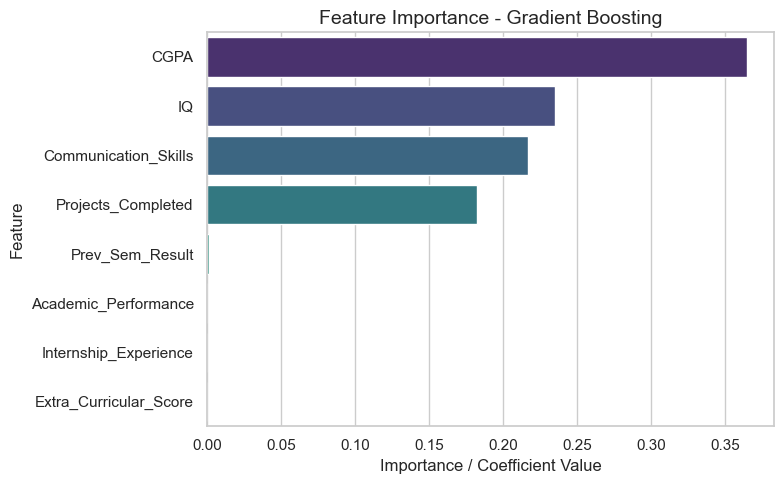

In [11]:
# ==========================================================
# 6. Model Interpretation & Insights
# ==========================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(model, model_name, X_train):
    """
    Display and plot feature importance or coefficients for any model.
    Handles tree-based and linear models automatically.
    """
    plt.figure(figsize=(8, 5))
    
    # Check model type and extract importances or coefficients
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
        title = f"Feature Importance - {model_name}"
    elif hasattr(model, "coef_"):
        importance = model.coef_[0]
        title = f"Feature Coefficients - {model_name}"
    else:
        print(f"{model_name} does not provide feature importance information.")
        return
    
    # Create DataFrame
    importance_df = pd.DataFrame({
        "Feature": X_train.columns,
        "Importance": importance
    }).sort_values(by="Importance", ascending=False)

    # Display table
    print(f"\n=== {model_name} ===")
    print(importance_df)

    # Plot
    sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
    plt.title(title, fontsize=14)
    plt.xlabel("Importance / Coefficient Value")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

# Call the function for all models
for model_name, model in models.items():
    plot_feature_importance(model, model_name, X_train)

In [12]:
# ==========================================================
# 7. Save Trained Model and Scaler
# ==========================================================
import joblib
import os

# Create model directory if not exists
os.makedirs("../model", exist_ok=True)

# Save the best model (Gradient Boosting)
model_path = "../model/placement_model.joblib"
joblib.dump(models["Gradient Boosting"], model_path)

# Save the scaler
scaler_path = "../model/scaler.joblib"
joblib.dump(scaler, scaler_path)

print(f"Model saved to: {model_path}")
print(f"Scaler saved to: {scaler_path}")

Model saved to: ../model/placement_model.joblib
Scaler saved to: ../model/scaler.joblib
